<a href="https://colab.research.google.com/github/shanxS/MLPlayground/blob/main/makemore_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install urllib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [1]:
from urllib.request import urlopen

words = urlopen("https://raw.githubusercontent.com/karpathy/makemore/master/names.txt").read().decode('utf-8').splitlines()
words[:10]


['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [2]:
len(words)

32033

In [3]:
min(len(w) for w in words)


2

In [4]:
max(len(w) for w in words)

15

In [5]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

# sorted(b.items(), key = lambda kv: -kv[1])

In [6]:
import torch

In [7]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s,i in stoi.items()}

In [8]:
N = torch.zeros(27,27,dtype = torch.int32)
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    N[stoi[ch1], stoi[ch2]] += 1


# given prob distriubtion of chars after a given char. Find the next char using 
# torch.multinomial(N[current_char], num_samples=1, replacement=True, generator=g)
# repeat this till we reach desired length.
# Desired length can also be a probablistic function

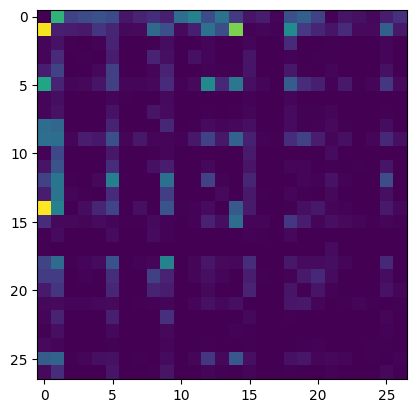

In [9]:
# EXPLORATORY

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [10]:
# EXPLORATORY

p = N[0].float()
p = p / p.sum()
g = torch.Generator().manual_seed(2147483647)
itos[torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()]

'j'

In [11]:
P = N.float()
P = P / P.sum(1, keepdim = True)

P[1].sum()

tensor(1.)

In [12]:
# FINAL GENERATION OF OUTPUT

ix = 0
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
  out = []
  while True:
    # p = N[ix].float()
    # p = p / p.sum()
    p = P[ix]

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    if ix == 0:
      break
    out.append(itos[ix])
  print(''.join(out))

junide
janasah
p
cony
a
nn
kohin
tolian
juee
ksahnaauranilevias
dedainrwieta
ssonielylarte
faveumerifontume
phynslenaruani
core
yaenon
ka
jabdinerimikimaynin
anaasn
ssorionsush


In [13]:
# MODEL QUALITY
log_likelihood = 0
n = 0
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    # print(f'{ch1}{ch2} {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(nll/n)

log_likelihood=tensor(-559891.7500)
nll=tensor(559891.7500)
tensor(2.4541)


In [18]:
# Setting up data for neural net
xs = []
ys = []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    # print(ch1, ch2)
    xs.append(stoi[ch1])
    ys.append(stoi[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g, requires_grad = True)

In [19]:
import torch.nn.functional as F

for k in range(10):
  xenc = F.one_hot(xs, num_classes=27).float()

  ### Forward pass
  logits = (xenc @ W)
  counts = logits.exp()
  probs = counts / counts.sum(1, keepdims = True)
  loss = -probs[torch.arange(num), ys].log().mean()
  print(loss)

  # Backward
  W.grad = None
  loss.backward()

  # Update
  W.data += -50.0 * W.grad

tensor(3.7590, grad_fn=<NegBackward0>)
tensor(3.3711, grad_fn=<NegBackward0>)
tensor(3.1540, grad_fn=<NegBackward0>)
tensor(3.0204, grad_fn=<NegBackward0>)
tensor(2.9277, grad_fn=<NegBackward0>)
tensor(2.8604, grad_fn=<NegBackward0>)
tensor(2.8097, grad_fn=<NegBackward0>)
tensor(2.7701, grad_fn=<NegBackward0>)
tensor(2.7381, grad_fn=<NegBackward0>)
tensor(2.7115, grad_fn=<NegBackward0>)


In [20]:
xs = 0
res = []
while True:
  xenc = F.one_hot(torch.tensor([xs]), num_classes=27).float()
  logits = (xenc @ W)
  counts = logits.exp()
  P = counts / counts.sum(1, keepdims = True)

  xs = torch.multinomial(P, num_samples=1, replacement=True, generator=g).item()
  if xs == 0:
    break
  res.append(itos[xs])

print(''.join(res))

mordwqjadkala
